# <font color='Purple'>Winery Analysis</font>

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [157]:
wine = pd.read_csv('/Users/howardyan/Desktop/Classes Spring 2021/IEOR 142 Slides/IEOR 142 Second Lab/wine_agg.csv')
wine.head(5)

,Year,LogAuctionIndex,WinterRain,HarvestRain,GrowTemp,HarvestTemp,Age,FrancePop,USAlcConsump
0,1952,7.4950,566.4,165.5,17.28,14.39,63,42.46,7.85
1,1953,8.0393,653.3,75.6,16.94,17.64,62,42.75,8.03
2,1955,7.6858,504.3,129.5,17.30,17.13,60,43.43,7.84
3,1957,6.9845,390.8,110.4,16.31,16.47,58,44.31,7.77
4,1958,6.7772,538.8,187.0,16.82,19.72,57,44.79,7.74


## Visually present relationships between variables

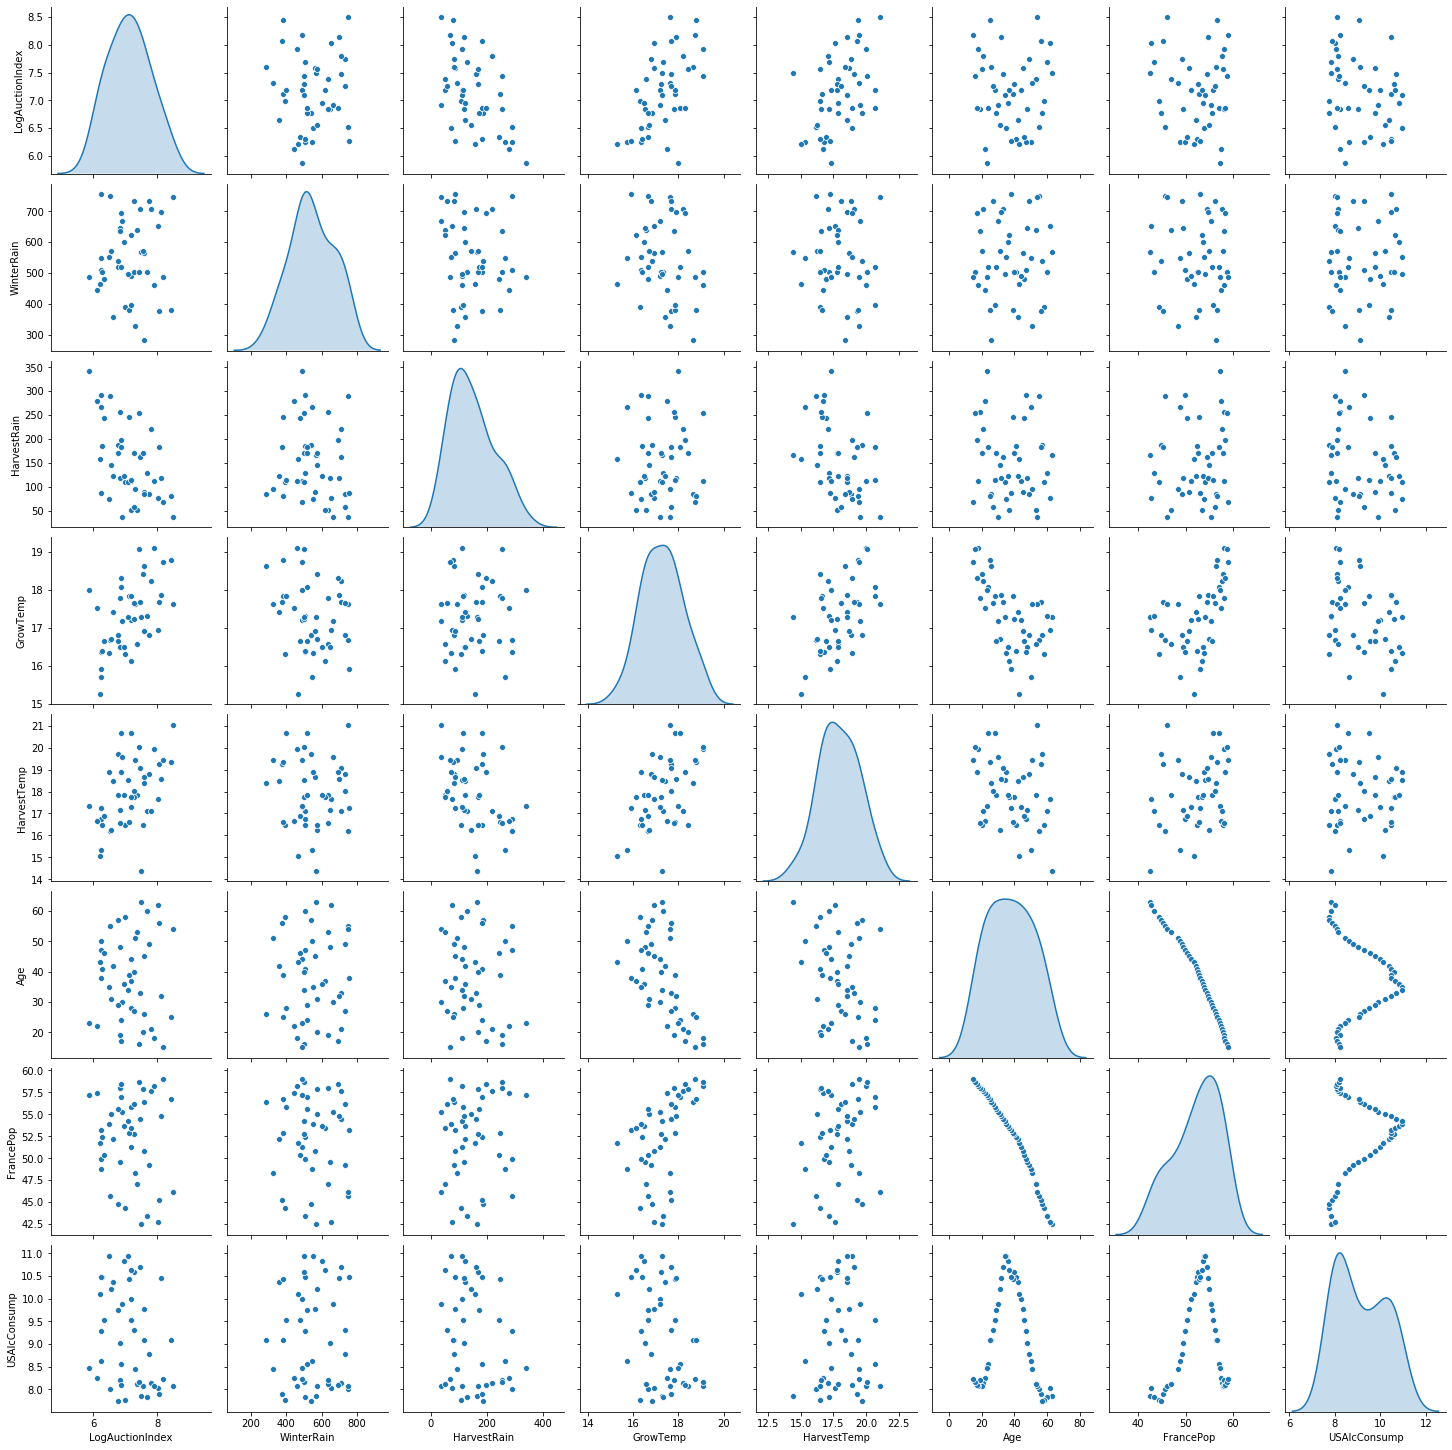

In [158]:
sns.pairplot(wine.iloc[:,1:9],diag_kind='kde');

## Analyze correlation between variables

In [159]:
wine.corr()

,Year,LogAuctionIndex,WinterRain,HarvestRain,GrowTemp,HarvestTemp,Age,FrancePop,USAlcConsump
Year,1.000000,-0.011346,-0.032424,0.128569,0.600924,0.277000,-1.000000,0.986137,0.131949
LogAuctionIndex,-0.011346,1.000000,0.058326,-0.525882,0.559727,0.469832,0.011346,-0.076993,-0.271188
WinterRain,-0.032424,0.058326,1.000000,-0.120258,-0.214181,-0.046874,0.032424,-0.045196,0.004174
HarvestRain,0.128569,-0.525882,-0.120258,1.000000,0.036437,-0.410439,-0.128569,0.112394,-0.220185
GrowTemp,0.600924,0.559727,-0.214181,0.036437,1.000000,0.513076,-0.600924,0.516918,-0.352116
HarvestTemp,0.277000,0.469832,-0.046874,-0.410439,0.513076,1.000000,-0.277000,0.250442,-0.035964
Age,-1.000000,0.011346,0.032424,-0.128569,-0.600924,-0.277000,1.000000,-0.986137,-0.131949
FrancePop,0.986137,-0.076993,-0.045196,0.112394,0.516918,0.250442,-0.986137,1.000000,0.269647
USAlcConsump,0.131949,-0.271188,0.004174,-0.220185,-0.352116,-0.035964,-0.131949,0.269647,1.000000


## Ensure that multi-collinearity is not an issue by analyzing VIF (Variance Inflation Factor)

In [160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

cols = ['WinterRain', 'HarvestRain', 'GrowTemp', 'HarvestTemp', 'Age', 'FrancePop', 'USAlcConsump']
VIF(wine, cols)

WinterRain        1.195702
HarvestRain       1.520805
GrowTemp          3.482817
HarvestTemp       1.834367
Age             149.736447
FrancePop       150.787510
USAlcConsump      4.192074
dtype: float64

## Evidently, Age and FrancePop have unusually high VIF (>10), so these two variables should be removed from the regression

In [167]:
print(smf.ols('LogAuctionIndex~WinterRain+HarvestRain+GrowTemp+HarvestTemp+USAlcConsump',data=wine).fit().summary())

                            OLS Regression Results                            
Dep. Variable:        LogAuctionIndex   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     16.04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           1.15e-08
Time:                        18:38:53   Log-Likelihood:                -20.106
No. Observations:                  46   AIC:                             52.21
Df Residuals:                      40   BIC:                             63.18
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1365      1.681      1.271   

## Note that the R2 is 0.667, which is relatively low. This may be due to inaccurate data collection before 1985. Therefore, I will filter this dataset to include only infomration after 1985

In [162]:
filtered_wine=wine[wine['Year']>=1985]
filtered_wine.head(5)

,Year,LogAuctionIndex,WinterRain,HarvestRain,GrowTemp,HarvestTemp,Age,FrancePop,USAlcConsump
30,1985,6.9171,667.1,37.2,17.19,19.56,30,55.28,9.88
31,1986,6.7793,518.5,171.2,16.65,17.86,29,55.58,9.75
32,1987,7.1797,397.0,115.1,17.84,20.70,28,55.82,9.52
33,1988,7.2646,734.2,58.8,17.65,18.05,27,56.12,9.30
34,1989,7.5922,282.4,85.2,18.62,18.40,26,56.42,9.09


In [166]:
model=smf.ols("LogAuctionIndex~WinterRain+HarvestRain+GrowTemp+HarvestTemp",data=filtered_wine).fit().summary()
print(model)

                            OLS Regression Results                            
Dep. Variable:        LogAuctionIndex   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     9.781
Date:                Sun, 07 Feb 2021   Prob (F-statistic):            0.00126
Time:                        18:38:44   Log-Likelihood:                -4.2751
No. Observations:                  16   AIC:                             18.55
Df Residuals:                      11   BIC:                             22.41
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.7722      3.128     -0.886      

###### Notice the improvement in R2 and note that the coefficient associated with GrowTemp increased from 0.42 to around 0.685. According to WineGuardian, wine grapes should not grow at temperatures exceeding 80 degrees Farenheit (32 degrees Celsius) for optimal taste. I then calculate the average temperature for the wine grape growth (in celsius).

In [161]:
np.mean(filtered_wine['GrowTemp'])

18.121875

##### Our regression indicates every additional 1 degree celsius increase is associated with a +$0.68 increase in log Auction Price.

## Now I analyze different wine auction prices over the years with a different dataset that includes winery names

In [92]:
wine2=pd.read_csv("/Users/howardyan/Desktop/Classes Spring 2021/IEOR 142 Slides/IEOR 142 Second Lab/wine_disagg.csv")

In [168]:
wine2.head(5)

,Winery,Year,Age,LogAuction,WinterRain,HarvestRain,GrowTemp,HarvestTemp,FrancePop,USAlcConsump
0,Cheval Blanc,1952,63,6.653108,566.4,165.5,17.28,14.39,42.46,7.85
1,Lafite-Rothschild,1952,63,6.861502,566.4,165.5,17.28,14.39,42.46,7.85
2,Cheval Blanc,1953,62,6.664192,653.3,75.6,16.94,17.64,42.75,8.03
3,Cheval Blanc,1955,60,6.311426,504.3,129.5,17.30,17.13,43.43,7.84
4,Lafite-Rothschild,1955,60,6.550209,504.3,129.5,17.30,17.13,43.43,7.84


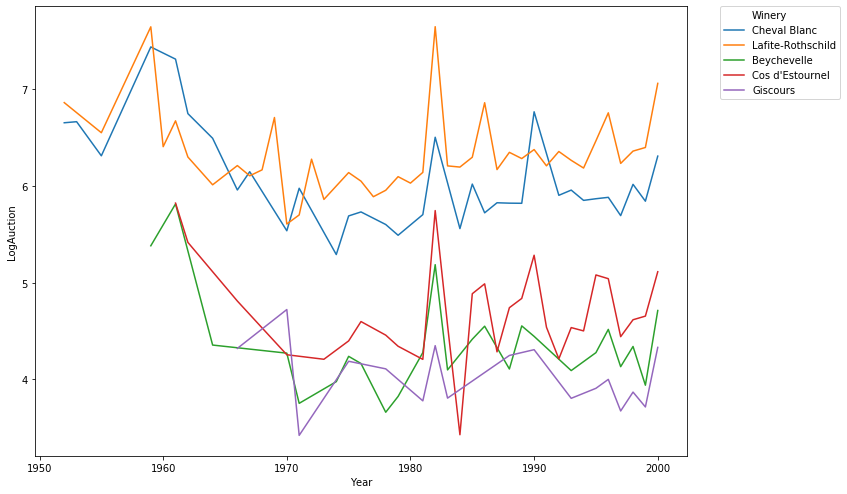

In [176]:
sns.lineplot(x="Year",y="LogAuction",hue="Winery",data=wine2);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.gcf().set_size_inches(11.7, 8.27)

##### It's evident there are two clusters of wineries: the Chevl Blanc and Rafite-Rothschild cluster presumably produces more premium wine, while the others do not,